In [368]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [369]:
# Load the data into a Pandas DataFrame
resedential_df_raw = pd.read_csv(
    "resources/house_price_index.csv")
resedential_df_raw['Date'] = pd.to_datetime(resedential_df_raw['Date'])
resedential_df_raw.set_index('Date', inplace=False)
#resedential_df_raw = resedential_df_raw.dropna(0,inplace= True)

wage_df_raw = pd.read_csv(
    "resources/wage_index.csv")
wage_df_raw['Date'] = pd.to_datetime(wage_df_raw['Date'])
wage_df_raw.set_index('Date', inplace=False)
#wage_df_raw = wage_df_raw.dropna(0,inplace= True)
# Display sample data
resedential_df_raw.head(1)




,Date,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;,Residential Property Price Index ; Weighted average of eight capital cities ;,...,Residential Property Price Index percentage change from corresponding quarter of previous year ; Weighted average of eight capital cities ;,Residential Property Price Index percentage change from previous quarter ; Sydney ;,Residential Property Price Index percentage change from previous quarter ; Melbourne ;,Residential Property Price Index percentage change from previous quarter ; Brisbane ;,Residential Property Price Index percentage change from previous quarter ; Adelaide ;,Residential Property Price Index percentage change from previous quarter ; Perth ;,Residential Property Price Index percentage change from previous quarter ; Hobart ;,Residential Property Price Index percentage change from previous quarter ; Darwin ;,Residential Property Price Index percentage change from previous quarter ; Canberra ;,Residential Property Price Index percentage change from previous quarter ; Weighted average of eight capital cities ;
0,2003-09-01,85.3,60.7,64.2,62.2,48.3,61.2,40.5,68.3,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [370]:
resedential_df_raw.dropna(inplace=True)


In [371]:
wage_df_raw.dropna(inplace=True)

In [372]:
hpi_yearly_change_df_raw = resedential_df_raw.iloc[:, [0, 10, 11, 12, 13, 14, 15, 16, 17,18]]

#hpi_yearly_change_df.to_csv("hpi_yearly_change_data.csv")

In [373]:
hpi_quaterly_change_df = resedential_df_raw.iloc[:, [0, 19, 20, 21, 22, 23, 24, 25, 26,27]]

hpi_quaterly_change_df.to_csv("hpi_quaterly_change_data.csv")
hpi_quaterly_change_df

,Date,Residential Property Price Index percentage change from previous quarter ; Sydney ;,Residential Property Price Index percentage change from previous quarter ; Melbourne ;,Residential Property Price Index percentage change from previous quarter ; Brisbane ;,Residential Property Price Index percentage change from previous quarter ; Adelaide ;,Residential Property Price Index percentage change from previous quarter ; Perth ;,Residential Property Price Index percentage change from previous quarter ; Hobart ;,Residential Property Price Index percentage change from previous quarter ; Darwin ;,Residential Property Price Index percentage change from previous quarter ; Canberra ;,Residential Property Price Index percentage change from previous quarter ; Weighted average of eight capital cities ;
4,2004-09-01,-0.2,0.0,-0.7,1.8,1.9,0.7,3.5,-2.1,0.0
5,2004-12-01,0.7,2.5,1.1,2.2,4.4,3.2,6.2,1.6,1.7
6,2005-03-01,-1.9,0.2,0.8,0.0,4.0,1.6,7.8,0.9,-0.1
7,2005-06-01,-0.7,1.1,1.0,1.0,5.4,1.5,2.1,-0.6,0.7
8,2005-09-01,-1.5,-0.2,0.4,1.0,4.2,-0.3,2.6,0.3,-0.1
...,...,...,...,...,...,...,...,...,...,...
69,2020-12-01,3.0,3.4,2.7,2.6,2.9,3.1,2.2,3.4,3.0
70,2021-03-01,6.1,5.1,4.0,4.0,5.2,6.1,4.7,5.6,5.4
71,2021-06-01,8.1,6.1,5.7,5.3,4.8,6.3,4.6,8.2,6.7
72,2021-09-01,6.2,3.6,6.1,5.9,2.0,8.2,1.6,6.0,5.0


In [374]:
wage_quaterly_change_df = wage_df_raw.iloc[:, [0, 10, 11, 12, 13, 14, 15, 16, 17,18]]

wage_quaterly_change_df.to_csv("wage_quaterly_change_data.csv")

In [375]:
wage_yearly_change_df = wage_df_raw.iloc[:, [0, 19, 20, 21, 22, 23, 24, 25, 26,27]]

wage_yearly_change_df.to_csv("wage_yearly_change_data.csv")
wage_yearly_change_df.head(10
                             )

,Date,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; New South Wales ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Victoria ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Queensland ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; South Australia ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Western Australia ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Tasmania ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Northern Territory ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Australian Capital Territory ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Australia ; Private and Public ; All industries ;
4,1998-09-01,3.6,3.3,3.3,3.1,3.4,2.5,3.1,2.8,3.3
5,1998-12-01,3.4,3.1,3.0,3.0,3.1,2.5,2.8,3.1,3.0
6,1999-03-01,3.4,2.9,3.0,3.1,2.7,2.6,2.9,3.1,3.2
7,1999-06-01,3.5,3.0,2.9,2.8,2.7,3.0,2.7,2.8,3.1
8,1999-09-01,3.2,2.9,2.9,2.6,2.6,3.0,2.7,2.6,3.0
9,1999-12-01,3.2,3.0,3.0,2.9,2.5,3.0,2.7,2.6,3.0
10,2000-03-01,2.8,3.0,2.9,2.7,2.7,2.6,2.4,2.3,2.7
11,2000-06-01,3.0,3.1,2.7,3.3,2.5,2.3,2.4,2.4,2.8
12,2000-09-01,3.5,3.1,2.5,3.1,3.1,2.4,2.5,3.1,3.1
13,2000-12-01,3.6,3.3,3.1,3.1,3.2,2.8,2.9,3.5,3.4


In [376]:
wage_yearly_change_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                                                                                  --------------  -----         
 0   Date                                                                                                                                                                                    99 non-null     datetime64[ns]
 1   Percentage Change from Corresponding Quarter of Previous Year ;  Total hourly rates of pay excluding bonuses ;  New South Wales ;  Private and Public ;  All industries ;               99 non-null     float64       
 2   Percentage 

In [377]:
x = wage_yearly_change_df.drop('Date', axis=1)
y = wage_yearly_change_df['Date']



In [378]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [379]:
# Review the y variable Series
# YOUR CODE HERE!
X_train.head()

,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; New South Wales ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Victoria ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Queensland ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; South Australia ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Western Australia ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Tasmania ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Northern Territory ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Australian Capital Territory ; Private and Public ; All industries ;,Percentage Change from Corresponding Quarter of Previous Year ; Total hourly rates of pay excluding bonuses ; Australia ; Private and Public ; All industries ;
42,3.8,3.8,4.1,4.5,5.9,3.5,3.7,4.1,4.1
97,2.4,2.3,2.4,2.1,2.0,3.0,2.1,2.6,2.3
31,3.9,4.2,3.8,3.7,5.0,4.7,4.2,4.9,4.1
44,3.7,4.2,4.2,3.9,5.0,4.0,4.4,3.8,4.0
102,3.5,3.5,3.7,3.6,4.1,4.1,2.9,3.7,3.6


In [380]:
# Review the X variable DataFrame
# YOUR CODE HERE!
y_test.head()

96   2021-09-01
87   2019-06-01
36   2006-09-01
84   2018-09-01
82   2018-03-01
Name: Date, dtype: datetime64[ns]

Create a Logistic Regression Model with the Original Data
Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [381]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LinearRegression()

# Fit the model using training data
# YOUR CODE HERE!
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

Step 3: Evaluate the model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [382]:
predictions

array([1.54415545e+18, 1.38032947e+18, 1.27497088e+18, 1.41491520e+18,
       1.48292827e+18, 1.26935519e+18, 1.34618150e+18, 1.38616422e+18,
       1.65680987e+18, 1.60118963e+18, 1.45735684e+18, 1.29288946e+18,
       1.17487293e+18, 1.49519834e+18, 1.29641524e+18, 1.20746858e+18,
       1.37928385e+18, 1.13300349e+18, 1.61503320e+18, 1.00543729e+18,
       1.08397871e+18, 1.37796500e+18, 1.34370032e+18, 1.18194845e+18,
       1.03569960e+18])

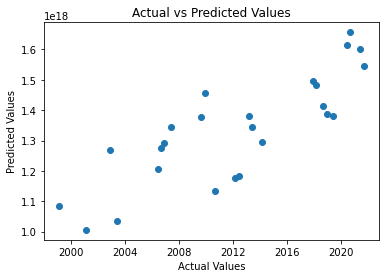

In [383]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [384]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual - no risk", "Actual - high risk"], columns=["Predicted - no risk", "Predicted - high risk"]
)

print(cm)
print(cm_df)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(y_test, predictions))

does it work well


Predict a Logistic Regression Model with Resampled Training Data
Step 1: Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [ ]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
y_train_ros.value_counts()

Step 2: Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
ros_model = LogisticRegression(solver='lbfgs', random_state=1)
# Fit the model using the resampled training data
# YOUR CODE HERE!
ros_model.fit(X_train_ros, y_train_ros)
# Make a prediction using the testing data
# YOUR CODE HERE!
ros_predictions = ros_model.predict(X_test)

Step 3: Evaluate the model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
acc_score_1 = balanced_accuracy_score(y_test, ros_predictions)

acc_score_1

NameError: name 'y_test' is not defined

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
cm1 = confusion_matrix(y_test, ros_predictions)
cm1_df = pd.DataFrame(
    cm1, index=["Actual - no risk", "Actual - high risk"], columns=["Predicted - no risk", "Predicted - high risk"]
)

print(cm1)
print(cm1_df)

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(y_test, ros_predictions))

Step 4: Answer the following question
Question: How well does the logistic regression model, fit with oversampled data, predict both the 0 (healthy loan) and 1 (high-risk loan) labels?

Answer:

This is a stronger performing model, with the balanced accuracy score sitting at its maximum value of 1.00.
The previous model can accurately predict no risk loans, with precision, recall, and f1-score of 1.00

NameError: name 'x' is not defined